In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.datasets import make_regression
X,y=make_regression(n_features=1,noise=10,n_samples=1000)

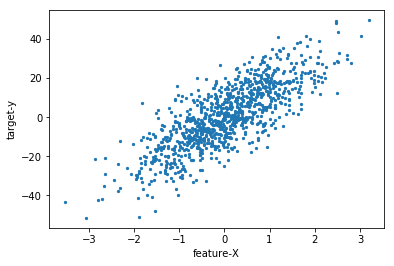

In [7]:
plt.xlabel('feature-X')
plt.ylabel('target-y')
plt.scatter(X,y,s=5)

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lr.coef_

array([12.90080943])

In [11]:
lr.intercept_

0.22922513370956865

In [12]:
pred=lr.predict(X)

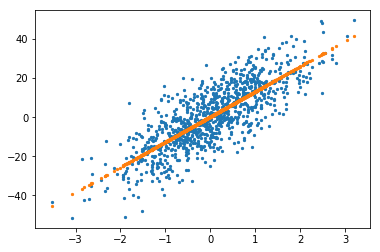

In [15]:
plt.scatter(X,y,s=5,label='training')
plt.scatter(X,pred,s=5,label='prediction')

In [19]:
#ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit([[0,0],[0,0],[1,1]],[0,.1,1])
lr.fit([[0,0],[0,0],[1,1]],[0,.1,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
ridge.coef_,lr.coef_

(array([0.44186047, 0.44186047]), array([0.475, 0.475]))

In [22]:
outliers = y[950:] - 600

In [26]:
import numpy as np
Y_out=np.append(y[:950],outliers)

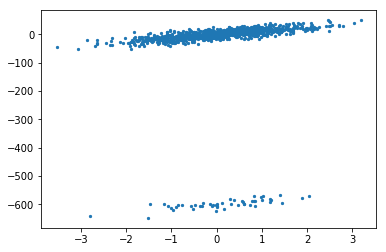

In [27]:
plt.scatter(X,Y_out,s=5)

In [29]:
lr.fit(X,Y_out)
pred_out=lr.predict(X)

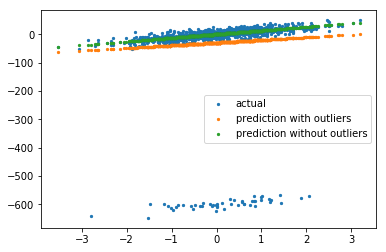

In [32]:
plt.scatter(X,Y_out,s=5,label='actual')
plt.scatter(X,pred_out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,label='prediction without outliers')
plt.legend()

In [33]:
lr.coef_

array([9.51883761])

In [36]:
ridge=Ridge(alpha=1000)
ridge.fit(X,Y_out)
pred_ridge=ridge.predict(X)

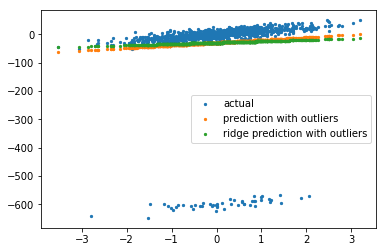

In [37]:
plt.scatter(X,Y_out,s=5,label='actual')
plt.scatter(X,pred_out,s=5,label='prediction with outliers')
plt.scatter(X,pred_ridge,s=5,label='ridge prediction with outliers')
plt.legend()

In [38]:
ridge.coef_

array([4.76871322])

In [39]:
#data generation
X,y,w=make_regression(n_samples=10,n_features=10,coef=True,random_state=1,bias=3.5)

In [40]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

In [42]:
#lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit([[0,0],[0,0],[1,1]],[0,.1,1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
lasso.coef_

array([0.5, 0. ])

In [44]:
#logistic regression
from sklearn.datasets import make_blobs

In [45]:
X,y=make_blobs(n_features=2,n_samples=1000,cluster_std=2,centers=2)

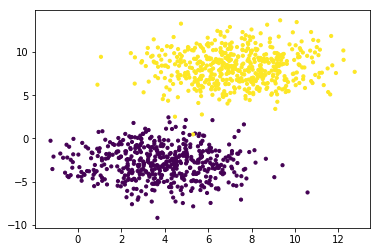

In [46]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

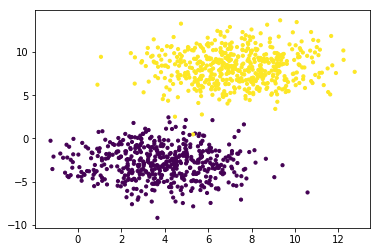

In [52]:
pred=lr.predict(X)
plt.scatter(X[:,0],X[:,1],c=y,s=10,label='actual')


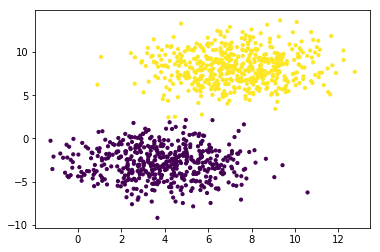

In [51]:
plt.scatter(X[:,0],X[:,1],c=pred,s=10,label='predicted')

In [53]:
#online learning
from sklearn.datasets import make_classification, make_regression

In [54]:
X,y = make_classification(n_classes=2,n_features=10,n_samples=10000)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
trainx,testx,trainy,testy=train_test_split(X,y)

In [57]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(n_iter=10)

In [58]:
sgd.partial_fit(trainx[:1500],trainy[:1500],classes=[0,1])
sgd.score(testx,testy)

0.9016

In [59]:
sgd.partial_fit(trainx[1500:5000],trainy[1500:5000],classes=[0,1])
sgd.score(testx,testy)

0.8984